In [6]:
import importlib
import os
import logging
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from params import Params
import params
importlib.reload(params)

import cache
importlib.reload(cache)


#logging.basicConfig(encoding='utf-8', level=logging.DEBUG)
import embeddings_base
importlib.reload(embeddings_base)

import rwkv_runner
importlib.reload(rwkv_runner)
from rwkv_runner import rwkv
importlib.reload(rwkv_runner)
from source_file_iterator import SourceFileIterator
import source_file_iterator
importlib.reload(source_file_iterator)

modelname = 'RWKV-4-Raven-3B-v11-Eng49%-Chn49%-Jpn1%-Other1%-20230429-ctx4096.pth'

os.environ["RWKV_CUDA_ON"] = '1'
r = rwkv(modelname,
         '20B_tokenizer.json',
         model_load=False)

iter = SourceFileIterator(r.data_top_dir, r.data_subdirs, r.numTokensList)
dfs = []
for out in iter:
    file = out[0][1]
    numTokens = out[1][1]
    with open(file, "rb") as f:
        emb = r.getHeadPersistenceDiagramEmbeddings(f, numTokens)
    df = pd.DataFrame(emb)
    dfs.append(emb)
    #df['size']=0.01
dfs[0] # [2, n]のベクトル群から1次元に変換されている

embeddings_base_logger= <Logger embeddings_base (INFO)>
<class 'tokenizers.Tokenizer'>
tokenizer class= <class 'tokenizers.Tokenizer'>
key_prefix= rwkv:RWKV-4-Raven-3B-v11-Eng49%-Chn49%-Jpn1%-Other1%-20230429-ctx4096.pth:Tokenizer


array([   512.47054188,    545.00313224,    846.25454172,   1357.43848573,
         1415.77983403,   1487.98325219,   3595.37903194,   5805.53394246,
         7722.64100299, 104654.44221861,   1261.46694096,   1221.04799249,
         1490.44938223,   2042.47996546,   2082.48951222,   2163.25930472,
         4622.30012641,   6469.63140123,  10627.26109308, 105543.21180156])

In [7]:
import torch
r.CosSim(torch.tensor(dfs[0]), torch.tensor(dfs[1]))

0.7819093698321147

In [8]:
r.CosSim(dfs[0], dfs[1])

0.7819093698321149

In [9]:
type(dfs[0])

numpy.ndarray

In [10]:
r.JFIP(dfs[0], dfs[1])

0.8693162235456413

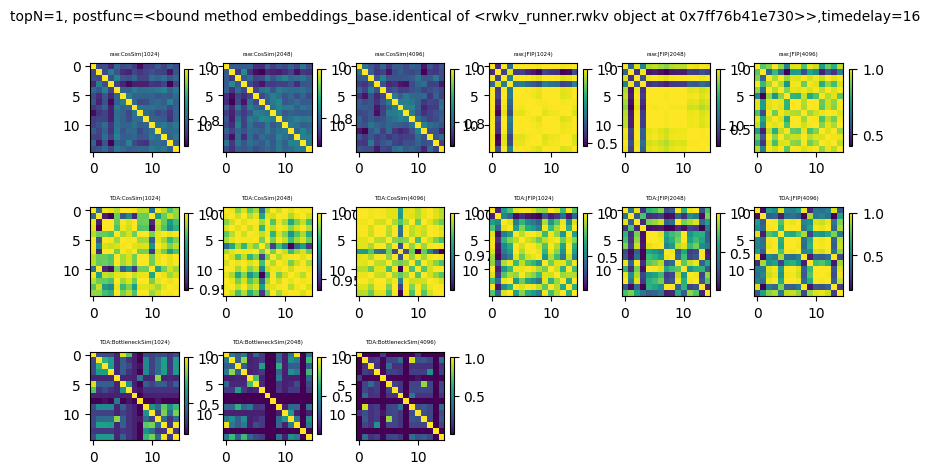

In [18]:
r.topN=1# delay=16
r.all_simMatrixPlot() 

(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)


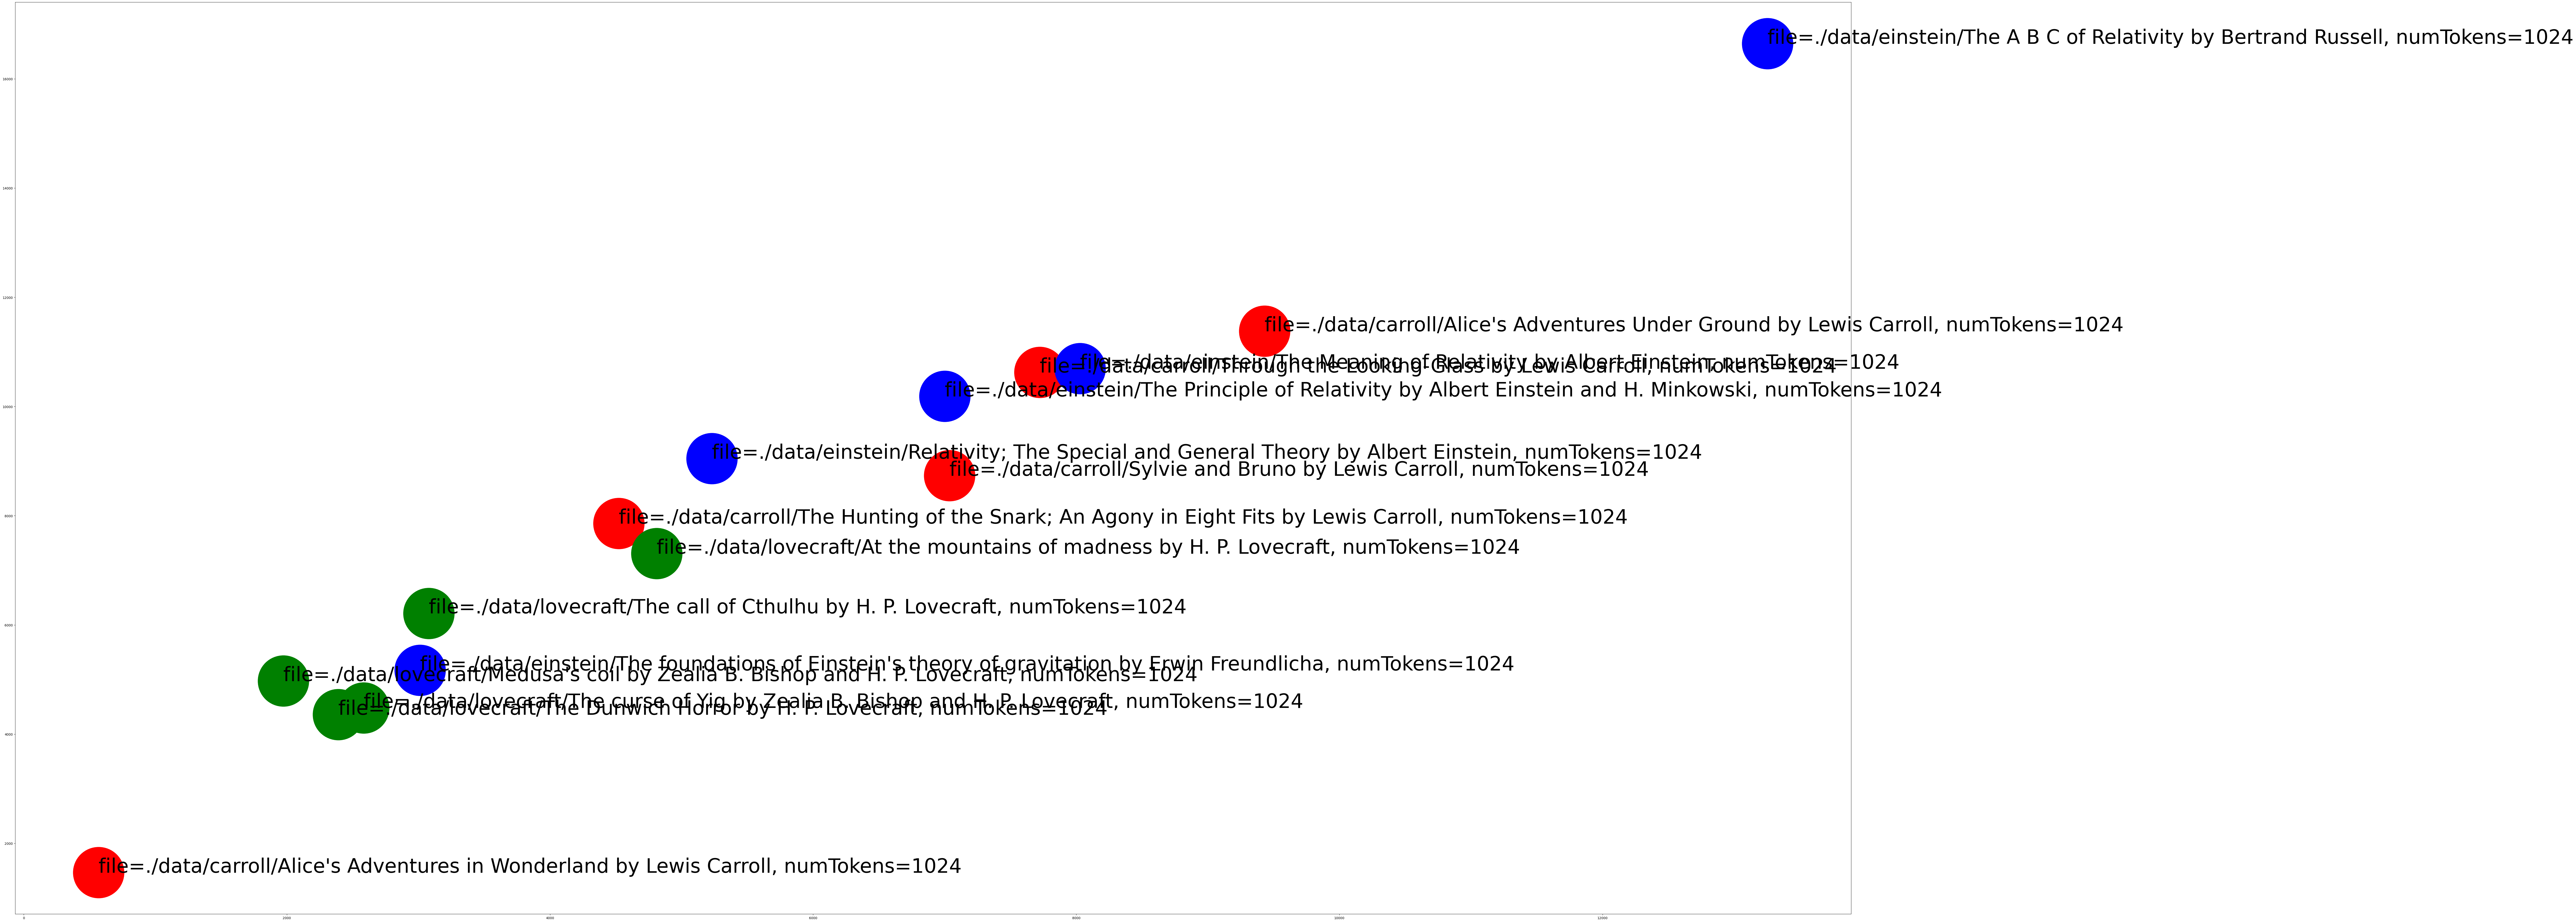

In [25]:
import textwrap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
colorMap = ["red", "blue", "green"]
#iter = SourceFileIterator(r.data_top_dir, r.data_subdirs, r.numTokensList)
tokensList = [1024]
iter = SourceFileIterator(r.data_top_dir, r.data_subdirs, tokensList)
fig = plt.figure(figsize=(100, 50))
ax = fig.add_subplot(1, 1, 1)
#ax.set_yscale("log")
count = 0
for out in iter:
    fileId = out[0][0]
    file = out[0][1]
    tokens = out[1][1]

    with open(file, "r", encoding="utf-8") as f:
        emb = r.getHeadPersistenceDiagramEmbeddings(f, tokens).reshape(2, -1)
        print(emb.shape)
        #tsne = TSNE(n_components=2, random_state = 0, perplexity = 10, n_iter = 1000)
        ax.scatter(np.mean(emb[0]), np.mean(emb[1]), c=colorMap[count // (5*len(tokensList))], s = 24000)
        #tsne_emb = tsne.fit_transform(np.array(emb.T))
        #ax.scatter(tsne_emb[0], tsne_emb[1], c=colorMap[count // (5*len(tokensList))], s = 3000)
        ax.text(np.mean(emb[0]), np.mean(emb[1]), f"file={f.name}, numTokens={tokens}", fontsize=60)
        #ax.text(tsne_emb[0][0], tsne_emb[1][0], f"file={f.name}, numTokens={tokens}", fontsize=30)
        
        count += 1

In [30]:
import textwrap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
colorMap = ["red", "blue", "green"]
#iter = SourceFileIterator(r.data_top_dir, r.data_subdirs, r.numTokensList)
tokensList = [1024]
iter = SourceFileIterator(r.data_top_dir, r.data_subdirs, tokensList)
#fig = plt.figure(figsize=(100, 50))
#ax = fig.add_subplot(1, 1, 1)
#ax.set_yscale("log")
count = 0
for out in iter:
    fileId = out[0][0]
    file = out[0][1]
    tokens = out[1][1]

    with open(file, "r", encoding="utf-8") as f:
        emb = r.getRwkvEmbeddings(f, tokens)
        print(emb)
        print(emb.shape)

tensor([ 0.1473, -0.0725,  0.5127,  ..., -0.3425,  0.0417,  0.0824],
       device='cuda:0')
torch.Size([12800])
tensor([-0.1277, -0.3271,  0.3442,  ..., -0.0911,  0.1930,  0.0644],
       device='cuda:0')
torch.Size([12800])
tensor([ 0.3513, -0.1152,  0.3098,  ...,  0.2527, -0.0148,  0.0222],
       device='cuda:0')
torch.Size([12800])
tensor([ 0.4307, -0.3262,  0.4717,  ..., -0.2277, -0.2444, -0.0283],
       device='cuda:0')
torch.Size([12800])
tensor([ 0.5078, -0.0320,  0.3994,  ...,  0.1378,  0.2927,  0.1384],
       device='cuda:0')
torch.Size([12800])
tensor([-0.0127, -0.0614,  0.1974,  ..., -0.0588, -0.0775,  0.0650],
       device='cuda:0')
torch.Size([12800])
tensor([ 0.0439, -0.0206,  0.0335,  ...,  0.1331,  0.0553,  0.1323],
       device='cuda:0')
torch.Size([12800])
tensor([-0.2460, -0.3762,  0.3191,  ..., -0.0069,  0.0805, -0.0987],
       device='cuda:0')
torch.Size([12800])
tensor([-0.4338, -0.4866,  0.4023,  ..., -0.0267,  0.1664,  0.0097],
       device='cuda:0')
tor